<h1 style="color:#4FC3F7;">0. Conceptos previos</h1>


Antes de empezar a programar es importante tener claro qué problema se quiere resolver. En este proyecto la idea principal es que una computadora pueda aprender a tomar decisiones usando datos numéricos, o sea que pueda identificar a qué categoría pertenece cada ejemplo. Esto corresponde a un problema de <span style="color:#FFEB3B; font-weight:bold;"> clasificación supervisada </span> porque durante el entrenamiento ya se conoce la respuesta correcta de cada dato. El modelo no inventa nuevas clases sino que aprende a elegir una de las que ya existen. En el caso del <span style="color:#FFEB3B; font-weight:bold;"> dataset CoverType </span> la variable objetivo indica distintos tipos de cobertura forestal. Como hay <span style="color:#FFEB3B; font-weight:bold;"> siete tipos posibles </span> y cada muestra pertenece solo a uno se trata de un problema de <span style="color:#FFEB3B; font-weight:bold;"> clasificación multiclase supervisada</span>.

Los datos vienen organizados en un dataset que puede verse como una tabla grande. Cada fila representa una muestra y cada columna una característica que describe esa muestra, o sea los <span style="color:#FFEB3B; font-weight:bold;"> features</span>. Entre estas características hay datos como la elevación del terreno, la pendiente, la distancia a ríos o carreteras y otros valores numéricos. Además existe una columna especial que indica la clase correcta de cada muestra, conocida como <span style="color:#FFEB3B; font-weight:bold;"> label </span>. Todas las demás columnas forman el conjunto de datos de entrada que el modelo usará para aprender.

Antes de entrenar el modelo, se realiza una exploración de los datos <span style="color:#FFEB3B; font-weight:bold;"> (EDA).</span> En esta etapa se revisa cuántos datos hay, cuántas variables tiene cada muestra, cómo están distribuidas las clases y si existe algún desbalance entre ellas. También se observan los rangos de los valores numéricos, esto es muy importante. Un problema común es que algunas variables tengan valores muy grandes y otras muy pequeños, esto puede afectar el aprendizaje del modelo. Para evitar esto, se aplica una <span style="color:#FFEB3B; font-weight:bold;"> normalización o estandarización </span>  con el fin de que todas las variables estén en escalas similares y el entrenamiento sea más estable.

Luego de preparar los datos se construye el modelo. En este proyecto se utiliza una red neuronal artificial formada por varias capas. Cada capa combina los valores de entrada mediante <span style="color:#FFEB3B; font-weight:bold;"> pesos</span>, suma un <span style="color:#FFEB3B; font-weight:bold;"> sesgo</span>  y aplica una <span style="color:#FFEB3B; font-weight:bold;"> función de activación</span> . *Esta función permite que el modelo aprenda relaciones más complejas y no solo relaciones lineales simples.*

La arquitectura utilizada es un <span style="color:#FFEB3B; font-weight:bold;"> MLP (Multi-Layer Perceptron)</span>. Este tipo de red neuronal es <span style="color:#FFEB3B; font-weight:bold;"> feed-forward </span>, lo que significa que la información va desde la entrada hasta la salida sin retroceder. Está compuesta por una o más capas ocultas completamente conectadas. *Los MLP son modelos relativamente simples*, pero funcionan bien con datos tabulares como los del dataset **CoverType**. A diferencia de otros modelos más especializados, como las redes convolucionales para imágenes o las redes recurrentes para datos secuenciales, el MLP es una opción adecuada para este problema.

Para ubicar mejor a esta arquitectura, con ayuda de chat gpt hice este mapa mental. 

![Mapa mental](https://raw.githubusercontent.com/Josueeeoo-0/redes-neuronales-notebook-SIAFI/cc78f3207dc6d5f87fd6ead6eb92b11e58ae1948/imagenes/Mind%20Map%20Whiteboard%20in%20Blue%20and%20Yellow%20Simple%20Brainstorm%20Style%20(1).png)


Para que la red aprenda se define una <span style="color:#FFEB3B; font-weight:bold;"> función de pérdida</span> que mide qué tan lejos está la predicción del modelo de la respuesta real. En problemas de clasificación multiclase se usa comúnmente la <span style="color:#FFEB3B; font-weight:bold;"> entropía cruzada</span>. Durante el entrenamiento, el modelo hace una predicción, se calcula el error y luego se ajustan los pesos para reducir ese error. Este proceso se realiza mediante el <span style="color:#FFEB3B; font-weight:bold;"> algoritmo de backpropagation</span>. <span style="color:#FFEB3B; font-weight:bold;"> PyTorch </span>  **se encarga de automatizar estos cálculos, lo que facilista la implementación del modelo.**

**Todo el desarrollo se realiza usando PyTorch, una librería muy utilizada para aprendizaje profundo**. PyTorch trabaja con <span style="color:#FFEB3B; font-weight:bold;"> tensores </span> *que son similares a los arrays de NumPy*, pero están optimizados para este tipo de cálculos. Además, permite usar tanto la <span style="color:#FFEB3B; font-weight:bold;">CPU </span> como la <span style="color:#FFEB3B; font-weight:bold;"> GPU </span>. La GPU es especialmente útil porque puede realizar muchos cálculos en paralelo, lo que reduce el tiempo de entrenamiento, sobre todo cuando se trabaja con grandes cantidades de datos.

Una vez entrenado el model se evalúa usando datos que no fueron utilizados durante el entrenamiento. El objetivo es verificar qué tan bien generaliza el modelo a datos nuevos. Una métrica común es la <span style="color:#FFEB3B; font-weight:bold;"> accuaracy</span> que indica el porcentaje de predicciones correctas

<h1 style="color:#4FC3F7;">1. El dataset CoverType</h1>


Antes de entrenar cualquier red neuronal necesitamos saber qué información tenemoss. El dataset CoverType es un conjunto de datos reales que describe diferentes zonas de bosque en Estados Unidos. Cada fila del dataset representa un área específica de terreno, y el objetivo es predecir qué tipo de cobertura forestal hay en esa zona.

Cuando hablamos de *"cobertura forestal"* nos referimos a categorías como pino, abeto, bosque mixto, etc. En total el dataset tiene 7 tipos distintos de cobertura y cada uno de ellos será una clase diferente que el modelo deberá aprender a identificar.

<h2 style="color:#81C784;">1.1 ¿Qué contiene exactamente el dataset y que significan?</h2>

El dataset CoverType está compuesto por dos partes principales: las features (características de entrada) y el label (la clase que queremos predecir).

Las <span style="color:#FFEB3B; font-weight:bold;"> features</span> **son variables numéricas que describen el terreno. El dataset CoverType tiene 54 features en total. Se dividen en 4 grupos.**. 

Por ejemplo, algunas indican la elevación del suelo, otras la pendiente, otras la distancia a ríos o carreteras. También hay un grupo de variables binarias (solo 0 o 1) que representan el tipo de suelo. Cada una de estas variables aporta un poco de información y juntas forman una descripción completa del lugar.

Entonces cada fila representa un solo punto del terreno. Ese punto tiene características físicas como la elevación, la pendiente o la orientación, y además pertenece a una sola categoría de ciertas variables, como el tipo de suelo y el área silvestre. No puede pertenecer a varias categorías al mismo tiempo.

En la realidad, un terreno solo puede tener un tipo de suelo dominante, no varios a la vez. Como los modelos de machine learning trabajan con números, esa categoría se transforma usando una técnica llamada <span style="color:#FFEB3B; font-weight:bold;"> one-hot encoding</span> que consiste en crear una columna por cada tipo posible de suelo.

Por eso existen columnas como `Soil_Type_1`, `Soil_Type_2`, …, `Soil_Type_40`. Si el terreno corresponde al suelo tipo 14, entonces la columna `Soil_Type_14` toma el valor 1, indicando “este es el suelo presente”, y todas las demás columnas de suelo valen 0, indicando "este suelo no está presente". Solo una columna puede valer 1 porque el terreno no puede tener dos suelos distintos al mismo tiempo.

Lo mismo ocurre con las columnas `Wilderness_Area_1` a `Wilderness_Area_4`. Cada punto del terreno se encuentra en una sola área silvestre, así que únicamente una de esas columnas será 1 y las demás serán 0. De nuevo, el 1 significa “sí pertenece” y el 0 significa “no pertenece”.

**Esta representación se usa porque no existe un orden numérico real entre los tipos de suelo o las áreas silvestres. Si se usara un solo número (por ejemplo, suelo = 14), el modelo podría interpretar erróneamente que el suelo 14 es "mayor" o "mejor" que el suelo 5, cuando en realidad solo son categorías distintas sin jerarquía.**

Es por eso que:
- **Variables numéricas (10)**

| Nº | Feature                            |
| -: | ---------------------------------- |
|  1 | Elevation                          |
|  2 | Aspect                             |
|  3 | Slope                              |
|  4 | Horizontal_Distance_To_Hydrology   |
|  5 | Vertical_Distance_To_Hydrology     |
|  6 | Horizontal_Distance_To_Roadways    |
|  7 | Hillshade_9am                      |
|  8 | Hillshade_Noon                     |
|  9 | Hillshade_3pm                      |
| 10 | Horizontal_Distance_To_Fire_Points |

- **Wilderness Area (One-Hot Encoding, 4)**

| Nº | Feature           |
| -: | ----------------- |
| 11 | Wilderness_Area_1 |
| 12 | Wilderness_Area_2 |
| 13 | Wilderness_Area_3 |
| 14 | Wilderness_Area_4 |

- **Soil Type (One-Hot Encoding, 40)**

| Nº | Feature      |
| -: | ------------ |
| 15 | Soil_Type_1  |
| 16 | Soil_Type_2  |
| 17 | Soil_Type_3  |
| 18 | Soil_Type_4  |
| 19 | Soil_Type_5  |
| 20 | Soil_Type_6  |
| .. | ...........  |
| 54 | Soil_Type_40 |



El <span style="color:#FFEB3B; font-weight:bold;"> label </span> en cambio es un número entero entre 1 y 7 que indica el tipo de cobertura forestal. Este número es lo que el modelo debe aprender a predecir. Durante el entrenamiento el modelo ve tanto las features como el label, pero durante la evaluación, solo ve las features y debe adivinar el label.

| Label | Tipo de cobertura forestal                                          |
| ----: | ------------------------------------------------------------------- |
| **1** | **Spruce / Fir** (Abeto / Pícea)                                    |
| **2** | **Lodgepole Pine** (Pino contorta)                                  |
| **3** | **Ponderosa Pine** (Pino ponderosa)                                 |
| **4** | **Cottonwood / Willow** (Álamo / Sauce)                             |
| **5** | **Aspen** (Álamo temblón)                                           |
| **6** | **Douglas-fir** (Abeto de Douglas)                                                     |
| **7** | **Krummholz** (árboles deformados por clima extremo, zonas alpinas) |




Esto es lo que hace que el problema sea de aprendizaje supervisado: tenemos ejemplos con respuesta correcta.

<h2 style="color:#81C784;">1.2 Cargamos el dataset</h2>

Para trabajar con el dataset usamos una función de scikit-learn que ya descarga y organiza los datos por nosotros.

In [1]:
from sklearn.datasets import fetch_covtype

data = fetch_covtype()
X = data.data
y = data.target


La variable `X` contiene las features, es decir, todos los datos de entrada. Es una matriz donde cada fila es una muestra y cada columna es una feature. La variable `y` contiene los labels, es decir, la clase correcta de cada muestra.

<h2 style="color:#81C784;">1.3 Tamaño y dimensionalidad del dataset</h2>

¿Qué tan grande es este dataset?. Esto importa mucho, porque entrenar redes neuronales con pocos datos suele ser mala idea, mientras que datasets grandes suelen beneficiarse más del deep learning.

In [2]:
print(X.shape)
print(y.shape)


(581012, 54)
(581012,)


El resultado indica que el dataset CoverType contiene un total de 581 012 muestras, donde cada muestra está representada por 54 características, mientras que el vector de etiquetas tiene una clase asociada para cada ejemplo

<h2 style="color:#81C784;">1.4 ¿Qué significan estas features?</h2>

Las primeras columnas suelen ser variables continuas, como elevación o distancia. Más adelante aparecen columnas binarias que indican pertenencia a ciertos tipos de suelo. 

Esto tiene una consecuencia importante: no todas las features están en la misma escala. Algunas pueden tomar valores grandes otras solo 0 o 1. Esto nos lleva a la idea de que más adelante necesitaremos <span style="color:#FFEB3B; font-weight:bold;"> normalizar </span> los datos antes de entrenar la red neuronal.

<h2 style="color:#81C784;">1.5 Distribución de las clases</h2>

Otro aspecto clave es ver cuántos ejemplos hay de cada clase, o sea de las 7 que hay, cuantas muestras le pertenecen a cada clase de las 5481 012 muestras que hay. Esto se llama la <span style="color:#FFEB3B; font-weight:bold;"> distribución de clases </span> y nos ayuda a detectar si el dataset está balanceado o no.

In [3]:
import numpy as np

np.unique(y, return_counts=True)


(array([1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([211840, 283301,  35754,   2747,   9493,  17367,  20510]))

El resultado muestra que el dataset CoverType contiene 7 clases (etiquetadas del 1 al 7) con una distribución claramente desigual: las clases 2 y 1 concentran la mayoría de los ejemplos (283 301 y 211 840 respectivamente) mientras que otras clases como la 4 (solo 2 747 muestras) y la 5 (9 493 muestras) están muy poco representadas. 

Esto revela que el dataset está desbalanceado, esto hace que un modelo entrenado directamente podría tender a favorecer las clases dominantes y obtener una <span style="color:#FFEB3B; font-weight:bold;">accuracy</span> aparentemente alta sin necesariamente comportarse bien en las clases de menor muestras. Pero dado el gran tamaño total del dataset y que incluso las clases pequeñas tienen miles de ejemplos, resulta aceptable para este caso, sin aplicar técnicas de balanceo.

Pero tengamos en cuenta que existen correcciones (como <span style="color:#FFEB3B; font-weight:bold;"> ponderación de clases </span>  o <span style="color:#FFEB3B; font-weight:bold;">resampling</span>) para fases posteriores del modelado.

<h1 style="color:#4FC3F7;">2. Preprocesamiento de datos: preparando la información para la red neuronal</h1>


Hasta ahora solo hemos cargado y observado el dataset. Eso nos permitió entender qué tipo de problema tenemos y cómo están organizados los datos, pero todavía no están listos para entrar a una red neuronal. Esta etapa se llama preprocesamiento, y consiste en transformar los datos crudos en una forma digerible para el modelo.

Una red neuronal no responde bien cuando las variables están en escalas muy distintas o cuando los datos presentan distribuciones extremas. Si el modelo recibe características desbalanceadas o mal normalizadas, el proceso de entrenamiento puede volverse inestable, lo que lleva a que la red aprenda relaciones que no representan el problema real.

En nuestro caso, ya vimos que algunas features toman valores grandes (como elevación o distancias), mientras que otras son binarias (0 o 1). Si dejamos todo tal cual, las variables grandes dominarán el aprendizaje solo por su valor o magnitud. Para evitar esto, vamos a aplicar una transformación llamada <span style="color:#FFEB3B; font-weight:bold;"> estandarización </span>.

Estandarizar significa transformar cada feature para que tenga media cero y desviación estándar uno. En palabras simples: todas las columnas quedan centradas y con una escala comparable. Esto no cambia la información esencial de los datos, pero hace que el entrenamiento sea mucho más eficiente.

<h2 style="color:#81C784;">2.1 Normalización (StandardScaler)</h2>

Vamos a usar StandardScaler de scikit-learn, que implementa exactamente esta transformación. **Lo usamos en el archivo *2_3_2_classfication_algorithms* para estandarizar el data set de iris.**

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Aquí ocurren dos cosas importantes.

Primero, `fit_transform` calcula la media y la desviación estándar de cada feature usando todo X, y luego aplica la transformación. El resultado es `X_scaled`, que contiene los mismos datos que X, pero ahora normalizados.

Segundo, guardamos el objeto `scaler`. Esto es importante porque más adelante, si tuviéramos datos nuevos, deberíamos usar el mismo `scaler` para transformarlos.

Conceptualmente, en este punto ya tenemos los mismos datos pero expresados en una forma matemática más amigable para una red neuronal.

<h2 style="color:#81C784;">2.2 Separación en conjuntos: entrenamiento, validación y prueba</h2>

Sabemos perfectamente que no podemos entrenar y evaluar usando los mismos datos. Si lo hiciéramos, el modelo podría simplemente memorizar los ejemplos y parecer perfecto, aunque en realidad no generalice a datos nuevos. Para evitar esto, dividimos el dataset en tres partes:

- Entrenamiento (train): aquí el modelo aprende.
- Validación (validation): aquí ajustamos hiperparámetros y observamos el comportamiento durante el entrenamiento.
- Prueba (test): aquí evaluamos el resultado final.


Primero separamos un conjunto de prueba:

In [5]:
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Esto deja el 80% de los datos para entrenamiento + validación y el 20% para prueba.

Luego dividimos ese 80% en entrenamiento y validación:

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=42
)


Ahora tenemos tres conjuntos bien definidos.

Desde el punto de vista conceptual, esto significa que el modelo verá `X_train` muchas veces durante el entrenamiento, verá `X_val` ocasionalmente para verificar cómo va aprendiendo, y solo verá `X_test` una vez al final, para medir su desempeño real.

PERO, ¿PORQUE ACA NO <span style="color:#FFEB3B; font-weight:bold;"> ESTRATIFICAMOS </span> *el dataset así como lo **hicimos con el PROYECTO A2B - n°1***?

En este caso, con el dataset CoverType estamos usando una división aleatoria normal porque estamos trabajando con muchísimos datos: más de medio millón de muestras y miles de ejemplos incluso en las clases más pequeñas. Con un volumen así, al hacer un split aleatorio las proporciones de cada clase se conservan casi automáticamente, por simple estadística. Además, aquí no existen identidades específicas como personas, sino observaciones independientes, por lo que no hay riesgo real de que alguna clase desaparezca o quede mal representada.

En cambio, con datasets pequeños como Olivetti Faces la historia es distinta. Cada persona solo tiene unas pocas imágenes, así que si dividimos al azar es muy fácil que algunas aparezcan poco en entrenamiento, casi nada en prueba, o incluso que no aparezcan en alguno de los conjuntos. Eso hace que la evaluación sea poco confiable. Por eso se usa  <span style="color:#FFEB3B; font-weight:bold;">muestreo estratificado</span>: para asegurarnos de que cada persona tenga una cantidad similar de imágenes tanto en entrenamiento como en prueba.

No es que uno sea "mejor" que el otro sino que depende del contexto. Cuando el dataset es grande, como CoverType, una división simple funciona bien. Pero cuando el dataset es pequeño y sensible al desbalance, como en reconocimiento facial, el muestreo estratificado se vuelve necesario para que el modelo aprenda y se evalúe de forma justa.
 

ME PARECIO INTERESANTE HACER ESA DIFERENCIA :D

<h2 style="color:#81C784;">2.3 De NumPy a PyTorch: tensores</h2>

Hasta ahora hemos trabajado con arrays de NumPy, pero PyTorch usa su propia estructura de datos llamada <span style="color:#FFEB3B; font-weight:bold;">tensor</span>. Un array se entiende como tabla de números organizada en filas y columnas (o en más dimensiones), que permite almacenar y manipular datos de forma eficiente en Python, y es la base de muchas operaciones numéricas en ciencia de datos. Sin embargo, PyTorch utiliza tensores, que son muy parecidos a los arrays, pero tienen dos ventajas clave: <span style="color:#FFEB3B; font-weight:bold;">pueden ejecutarse directamente en la GPU </span> y pueden <span style="color:#FFEB3B; font-weight:bold;">participar en cálculos automáticos de gradientes</span>. Por eso ahora convertimos todo a tensores.

Para las entradas `(X_train, X_val, X_test)` usamos `dtype=torch.float32`, que es el tipo estándar para datos numéricos en redes neuronales y permite realizar operaciones de forma eficiente tanto en CPU como en GPU.

In [7]:
import torch

X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_val_t   = torch.tensor(X_val, dtype=torch.float32)
X_test_t  = torch.tensor(X_test, dtype=torch.float32)


Luego convertimos las etiquetas `(y_train, y_val, y_test)` a tensores de tipo `torch.long`:

In [8]:
y_train_t = torch.tensor(y_train - 1, dtype=torch.long)
y_val_t   = torch.tensor(y_val - 1, dtype=torch.long)
y_test_t  = torch.tensor(y_test - 1, dtype=torch.long)


Aquí aparecen dos detalles importantes. Primero, restamos 1 a las etiquetas porque el dataset CoverType numera las clases del 1 al 7, mientras que PyTorch espera que las clases comiencen en 0. De esta forma, las etiquetas pasan a ser 0, 1, 2, 3, 4, 5 y 6 evitando errores al usar funciones de pérdida como <span style="color:#FFEB3B; font-weight:bold;">CrossEntropyLoss</span> .

Segundo, usamos `torch.long` para las etiquetas porque PyTorch requiere este tipo de dato entero para representar clases en problemas de clasificación. Y esto es importante porque funciones como: `torch.nn.CrossEntropyLoss()` solo aceptan etiquetas en formato entero (long) ya que internamente usan esos valores como índices de clase. En cambio, las variables de entrada se mantienen como float32, ya que las capas de la red neuronal trabajan con valores reales. 

<h2 style="color:#81C784;">2.4 Dataset y DataLoader: alimentando datos al modelo</h2>

Aunque ya contamos con los datos en forma de tensores, PyTorch trabaja de manera más eficiente cuando utilizamos dos estructuras clave: <span style="color:#FFEB3B; font-weight:bold;">Dataset</span> y <span style="color:#FFEB3B; font-weight:bold;">DataLoader</span>.

Un Dataset simplemente organiza los datos, juntando cada muestra con su etiqueta correspondiente. En nuestro caso usamos <span style="color:#FFEB3B; font-weight:bold;">TensorDataset</span>, que toma directamente los tensores de entradas `(X)` y salidas `(y)` y los guarda como pares:

In [9]:
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset   = TensorDataset(X_val_t, y_val_t)
test_dataset  = TensorDataset(X_test_t, y_test_t)


Luego creamos los **DataLoader** que se encargan de iterar sobre el Dataset, agrupar las muestras en lotes  <span style="color:#FFEB3B; font-weight:bold;">(batches)</span> y si se desea mezclar los datos, dicho de otra manera *son los que realmente se encargan de entregar los datos al modelo durante el entrenamiento:*

In [10]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=256, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=256, shuffle=False)


Aquí aparece otro parámetro importante: `batch_size = 256`. Esto indica cuántas muestras se envían al modelo en cada paso del entrenamiento. La idea del batch es simple: en vez de pasar todos los datos al modelo de una sola vez, los dividimos en grupos pequeños. De esta forma, el modelo procesa 256 ejemplos a la vez, calcula el error y actualiza sus pesos, lo que hace que el entrenamiento sea más rápido, consuma menos memoria y sea más estable.

Además, usamos `shuffle = True` solo en el conjunto de entrenamiento para mezclar los datos en cada pasada. Esto evita que el modelo aprenda el orden de los ejemplos y ayuda a que se concentre en aprender patrones reales. En validación y prueba dejamos `shuffle = False` ya que ahí solo queremos medir el rendimiento del modelo de forma consistente, sin alterar el orden de los datos.

**OJOOOOOOOOOOOOOOOOO**

La elección del tamaño del batch también influye directamente en cómo aprende la red neuronal. Batches pequeños introducen más variabilidad en las actualizaciones de los pesos, lo que puede ayudar al modelo a escapar de mínimos locales, mientras que batches grandes producen actualizaciones más suaves y estables, pero requieren más memoria. En este trabajo se utiliza un `batch_size` de 256 como un compromiso entre eficiencia computacional y estabilidad del entrenamiento, aprovechando el gran tamaño del dataset sin sobrecargar los recursos disponibles. Según chat gpt ua recomendación es la de usar batches con valores comunes como 32, 64, 128 o 256 por razones de eficiencia computacional. También es habitual usar potencias de dos porque aprovechan mejor el hardware, especialmente en GPU

Lo que estamos construyendo está a base de los tres notebooks de clase:

- **3_1_fundamentals.ipynb** → conceptos básicos: datasets, features, labels, splits, normalización
- **3_2_ann.ipynb** → qué es una ANN/MLP, capas, activaciones, forward pass
- **3_3_pytorch.ipynb** → tensores, módulos, entrenamiento, optimizadores, GPU

Hasta ahora hemos estado trabajando sobre todo lo que corresponde al **3_1_fundamentals (datos, splits, normalización).**

Ahora entraremos en lo que vimos en **3_2_ann** y **3_3_pytorch.**

<h1 style="color:#4FC3F7;">3. Construcción de la red neuronal (MLP) en PyTorch</h1>


Hasta este punto solo hemos preparado los datos, todavía no existe ningún modelo. Ahora entramos en la parte central del proyecto: la construcción de la red neuronal. Esta sección conecta directamente con lo visto en el notebook **3_2_ann.ipynb**, donde se introdujo el concepto de <span style="color:#FFEB3B; font-weight:bold;">Artificial Neural Network </span>como una combinación de capas y funciones de activación, y con **3_3_pytorch.ipynb** donde se mostró cómo implementar estas ideas usando `torch.nn.Module`.

En términos simples, una red neuronal puede verse como una función matemática con muchos parámetros. Recibe un conjunto de valores de entrada *(las features)*, los transforma paso a paso internamente y finalmente produce una salida, que en este caso corresponde a las probabilidades de pertenecer a cada *clase*. Cada uno de estos pasos consiste en una operación lineal <span style="color:#FFEB3B; font-weight:bold;">(multiplicación de matrices más un sesgo)</span>  seguida de una <span style="color:#FFEB3B; font-weight:bold;">función de activación</span>, lo que permite al modelo aprender relaciones complejas y no lineales en los datos.

En el notebook **3_2_ann** se explicó que una <span style="color:#FFEB3B; font-weight:bold;">MLP (Perceptrón Multicapa)</span> está formada por tres partes principales: **una capa de entrada, una o varias capas ocultas y una capa de salida**. En PyTorch la capa de entrada no se define explícitamente sino que queda determinada por el tamaño de la primera capa `Linear`. Las capas ocultas son las responsables de extraer patrones y relaciones internas en los datos, mientras que la capa de salida genera un valor por cada clase.

En nuestro caso:

- **entrada**: número de features (54 en CoverType)
- **salida**: 7 neuronas (una por clase)

O sea la red recibe como entrada 54 características que corresponden a las variables del dataset CoverType y produce como salida 7 valores, uno por cada tipo de cobertura forestal. 

Las capas intermedias no vienen dadas por el problema, sino que representan una decisión de diseño: su número y tamaño determinan la capacidad del modelo para aprender patrones complejos, y suelen elegirse mediante experimentación, buscando un equilibrio entre expresividad del modelo y riesgo de sobreajuste.

*Las capas intermedias son una decisión de diseño.*

<h2 style="color:#81C784;">3.1 Definición del modelo</h2>

Yo aca me pregunté ¿porque no importamos <span style="color:#FFEB3B; font-weight:bold;">MLP</span>  asi como lo hicimos como por ejemplo el algoritmo **LogisticRegression** en proyectos pasados?. Quizas parezca una pregunta tonta pero como principiante que soy, siento que es importante hacer esta aclaración. Además tambien de dar una pequeña explicación de lo que son los <span style="color:#FFEB3B; font-weight:bold;">bloques fundamentales</span>

A diferencia de algoritmos clásicos como la regresión logística, que se importan directamente desde una librería ya listos para usar, en PyTorch la red neuronal no viene predefinida. En su lugar, el modelo se construye manualmente. Esto significa que <span style="color:#FFEB3B; font-weight:bold;">MLP</span> no es un algoritmo incorporado, sino una clase creada por nosotros mismos para representar una arquitectura específica. PyTorch no entrega una red completa, sino herramientas básicas con las que el usuario arma su propio modelo, de forma similar a construir con piezas.

Entre estas herramientas se encuentran los llamados **bloques fundamentales**: <span style="color:#FFEB3B; font-weight:bold;">Module, Linear y ReLU</span>. `nn.Module` es la clase base de cualquier red neuronal en PyTorch. Puede entenderse como el "contenedor" del modelo. Gracias a **Module**, PyTorch sabe qué parámetros deben entrenarse, cómo mover el modelo a la GPU, cómo guardar los pesos y cómo ejecutar el aprendizaje. Sin heredar de `nn.Module`, el modelo no podría entrenarse correctamente.

Por su parte, `nn.Linear` representa una capa totalmente conectada. Matemáticamente realiza una operación del tipo  `y = W.x + b`, donde `x` es la entrada, `W` son los pesos que se aprenden durante el entrenamiento y `b` es un sesgo. En términos simples, **Linear** mezcla las variables de entrada y genera nuevas combinaciones numéricas que sirven como representaciones internas del problema. Cada *Linear** equivale a una capa de neuronas.

Finalmente, `nn.ReLU` es una función de activación. Su función es introducir no linealidad en la red. **ReLU** reemplaza todos los valores negativos por cero y deja pasar los positivos. Esto permite que la red neuronal aprenda relaciones complejas entre los datos; sin funciones de activación como **ReLU**, todas las capas juntas se comportarían como una sola operación lineal y el modelo sería demasiado limitado.

Con estos bloques **(Module, Linear y ReLU)**, nosotros construimos nuestra propia red neuronal. PyTorch proporciona las piezas, pero la arquitectura final depende completamente de nosotros.

Ahora sí escribimos el modelo en PyTorch

In [11]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),

            nn.Linear(128, 64),
            nn.ReLU(),

            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.net(x)


En PyTorch, un modelo se define como una clase de Python. Por eso comenzamos con:

1. `class MLP(nn.Module)`: Aquí estamos creando una nueva clase llamada MLP, que representará nuestra red neuronal completa. Puede pensarse como un “molde” a partir del cual luego crearemos el modelo real. Al escribir `nn.Module`, indicamos que esta clase hereda de Module, que es la clase base de todas las redes en PyTorch. Heredar significa que nuestra clase recibe automáticamente todas las funcionalidades de `nn.Module`, como el manejo de parámetros, el entrenamiento y la posibilidad de usar GPU. Sin esta herencia, PyTorch no reconocería nuestro modelo como una red neuronal. Esto es exactamente lo mismo que vimos en **3_3_pytorch.ipynb**: todo modelo en PyTorch debe heredar de `nn.Module`.

    Luego aparece:

2. `def __init__(self, input_dim, num_classes)`: Esta línea define el constructor de la clase. El constructor es una función especial que se ejecuta automáticamente cuando creamos el modelo, por ejemplo: `model = MLP(54, 7)`. En ese momento, `input_dim` toma el valor 54 y `num_classes` el valor 7.

    El parámetro `self` representa al propio objeto que se está creando. En términos simples, `self` es una forma de decir "este modelo". Cada vez que usamos `self.algo`, estamos guardando información dentro del modelo. Por ejemplo, más adelante usamos `self.net` para almacenar todas las capas de la red.

    Justo después tenemos:

3. `super(MLP, self).__init__()`: Esta línea inicializa correctamente la clase padre (`nn.Module`). Es una instrucción técnica necesaria para que PyTorch pueda registrar las capas y parámetros del modelo. Aunque no produce resultados visibles, es esencial.

    A continuación definimos la arquitectura:

4. `self.net = nn.Sequential(...)`: Aquí estamos creando un bloque llamado `net` que pertenece al modelo `(self)`. Dentro de `nn.Sequential` colocamos las capas en el orden en que se ejecutarán. Esto significa que los datos entrarán por la primera capa y luego pasarán automáticamente por todas las demás, una tras otra.

    La **primera capa** es:

5. `nn.Linear(input_dim, 128)`: Esta capa recibe las 54 características de entrada y las transforma en 128 valores internos. Es una capa totalmente conectada: cada neurona usa toda la información de entrada. Estos 128 valores no son interpretables directamente; son representaciones internas que la red aprende.

    Luego viene:

6. `nn.ReLU()`: Esta es la función de activación. Su función es introducir no linealidad, dejando pasar valores positivos y anulando los negativos. Gracias a `ReLU`, la red puede aprender relaciones complejas. Sin esta línea, todo el modelo sería equivalente a una sola transformación lineal.

    Después se repite el proceso:

7. `nn.Linear(128, 64)` que reduce la información de 128 a 64 neuronas, seguido nuevamente por:

8. `nn.ReLU()`

    Estas dos capas forman las capas ocultas del modelo. Su objetivo es extraer patrones progresivamente más abstractos desde los datos originales.

    Finalmente tenemos:

9. `nn.Linear(64, num_classes)`: Esta es la capa de salida. Convierte los 64 valores finales en 7 números, uno por cada clase del problema. Estos valores se llaman <span style="color:#FFEB3B; font-weight:bold;">logits</span>. No se aplica activación aquí porque más adelante se usa <span style="color:#FFEB3B; font-weight:bold;">CrossEntropyLoss</span> que ya incluye internamente el <span style="color:#FFEB3B; font-weight:bold;">softmax</span>.

    Después del constructor aparece:

10. `def forward(self, x)`: Este método define cómo fluye la información por la red. Cada vez que escribimos: 

11. `model(x)` PyTorch ejecuta automáticamente este método.

    Dentro del forward encontramos:

12. `return self.net(x)`

    Esto significa que el tensor de entrada x pasa por todas las capas almacenadas en self.net, produciendo finalmente las predicciones del modelo.

En resumen, esta clase define una <span style="color:#FFEB3B; font-weight:bold;">MLP</span> con dos capas ocultas (128 y 64 neuronas), activaciones <span style="color:#FFEB3B; font-weight:bold;">ReLU</span>  y una capa final de 7 salidas. La clase actúa como un molde del modelo, <span style="color:#FFEB3B; font-weight:bold;">self</span> representa al modelo mismo, <span style="color:#FFEB3B; font-weight:bold;">init</span>  construye la arquitectura y <span style="color:#FFEB3B; font-weight:bold;">forward</span>  define el recorrido de los datos.

Esto implementa exactamente el diagrama que vimos en **3_2_ann.ipynb**: entrada → capa oculta → capa oculta → salida.

<h2 style="color:#81C784;">3.2 Inicialización del modelo y uso de GPU</h2>

Aquí aparece un concepto clave del notebook **3_3_pytorch.ipynb**: el <span style="color:#FFEB3B; font-weight:bold;">device</span> .

Una vez definida la arquitectura de la red, el siguiente paso es crear el modelo real y decidir en qué dispositivo se va a ejecutar: <span style="color:#FFEB3B; font-weight:bold;">CPU</span> o <span style="color:#FFEB3B; font-weight:bold;">GPU</span> . Esto es importante porque las GPUs pueden acelerar mucho los cálculos, especialmente en redes neuronales.

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MLP(X_train.shape[1], 7)
model = model.to(device)


1. `device = torch.device("cuda" if torch.cuda.is_available() else "cpu")` : Aquí estamos preguntándole a PyTorch si existe una GPU disponible. `torch.cuda.is_available()` devuelve **True** si hay una GPU compatible (CUDA) y **False** si no. Si hay GPU, se usa "cuda". Si no, se usa "cpu".

    El resultado se guarda en la variable `device`. Esto nos permite escribir código flexible, o sea que el mismo programa funcionará tanto en una laptop sin GPU como en una máquina potente con tarjeta gráfica, sin cambiar nada más.

    Luego creamos el modelo:

2. `model = MLP(X_train.shape[1], 7)` : Aquí estamos instanciando la clase MLP que definimos antes. Es decir, estamos creando el modelo real a partir del "molde". `X_train.shape[1]` corresponde al número de columnas de los datos de entrada, es decir, al número de features (54 en CoverType). El 7 indica el número de clases.

    En otras palabras, esta línea le dice al modelo: "vas a recibir vectores de 54 valores y debes producir 7 salidas".

    Después viene una línea muy importante:

3. `model = model.to(device)` : Esto mueve el modelo completo al dispositivo elegido anteriormente (CPU o GPU). A partir de este momento, todos los pesos de la red viven en ese dispositivo. Esto es clave porque si el modelo está en GPU, los datos también deberán estar en GPU. Si está en CPU, los datos deben estar en CPU. PyTorch no permite mezclar dispositivos.

    Conceptualmente, aquí ocurre algo simple pero poderoso: el modelo ya está listo para entrenar y, si existe GPU, automáticamente aprovechará su velocidad sin cambiar el resto del código.

En esta sección elegimos el dispositivo de cómputo, creamos el modelo con las dimensiones correctas y lo trasladamos a ese dispositivo. Este patrón es estándar en PyTorch y permite escribir código portable y eficiente, independientemente del hardware disponible.

<h2 style="color:#81C784;">3.3 Función de pérdida y optimizador</h2>

Después de definir el modelo y moverlo al dispositivo correspondiente (CPU o GPU), todavía falta algo fundamental: *enseñarle cómo aprender*. Una red neuronal por sí sola solo produce salidas, pero para entrenarla necesitamos una forma de medir sus errores y un mecanismo para corregirlos. Justamente ahí entran la <span style="color:#FFEB3B; font-weight:bold;">función de pérdida </span> y el <span style="color:#FFEB3B; font-weight:bold;">optimizador</span>.

Esto se implementa con las siguientes líneas:

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


La primera línea define la función de pérdida. <span style="color:#FFEB3B; font-weight:bold;">CrossEntropyLoss</span> se utiliza en problemas de clasificación multiclase, como este, donde tenemos 7 categorías posibles. Su trabajo es comparar las predicciones del modelo con las etiquetas reales y devolver un único número que representa qué tan mal está funcionando la red. Cuanto más grande sea este valor, peor está prediciendo el modelo. Durante el entrenamiento intentaremos reducirlo lo más posible.

Internamente, <span style="color:#FFEB3B; font-weight:bold;">CrossEntropyLoss</span> combina dos operaciones: aplica <span style="color:#FFEB3B; font-weight:bold;">softmax</span> a las salidas del modelo (*Softmax es una función matemática que transforma las salidas crudas del modelo (llamadas logits) en probabilidades. Es decir, toma números cualquiera y los convierte en valores entre 0 y 1 cuya suma total es 1. De esta forma, cada salida puede interpretarse como la probabilidad de pertenecer a cada clase.*) y luego calcula la pérdida. Por eso, como se mencionó antes, la última capa del modelo no necesita una función de activación explícita.

La segunda línea define el optimizador. Aquí usamos <span style="color:#FFEB3B; font-weight:bold;">Adam</span> que es una <span style="color:#FFEB3B; font-weight:bold;">versión mejorada del gradiente descendente clásico</span>. Mientras que el gradiente descendente básico usa un solo tamaño de paso para todos los parámetros, Adam ajusta automáticamente el ritmo de aprendizaje de cada peso. Esto suele hacer el entrenamiento más estable y más rápido, especialmente en redes profundas.

El argumento `model.parameters()` le dice al optimizador qué debe actualizar: todos los pesos y sesgos del modelo. Sin esta parte, Adam no sabría qué valores modificar.

Finalmente, `lr = 0.001` corresponde al **learning rate (tasa de aprendizaje)**. Este valor controla qué tan grandes son los cambios que se hacen a los pesos en cada actualización. Si el learning rate es demasiado grande, el modelo puede volverse inestable y no converger. Si es demasiado pequeño, el aprendizaje será muy lento. El valor 0.001 es una elección común que suele funcionar bien como punto de partida.


En esta etapa definimos cómo se mide el error (**función de pérdida**) y cómo se corrigen los pesos del modelo (**optimizador**). A partir de aquí ya tenemos todo listo para comenzar el entrenamiento propiamente dicho: datos, modelo, dispositivo, pérdida y optimizador.

<h1 style="color:#4FC3F7;">4. Entrenamiento de la red neuronal</h1>


Hasta ahora solo hemos preparado los datos y definido el modelo. La red todavía no ha aprendido absolutamente nada. Sus pesos están inicializados de forma aleatoria, lo que significa que, si intentáramos predecir algo ahora mismo, el resultado sería prácticamente al azar.

El entrenamiento es el proceso mediante el cual la red ajusta esos pesos para minimizar el error. Esta etapa corresponde directamente a lo vimos en **3_2_ann.ipynb** cuando se presentó el ciclo: entrada → salida → pérdida → retropropagación → actualización de pesos y también a **3_3_pytorch.ipynb** donde se implementa este ciclo usando PyTorch.

Conviene detenernos un momento en la idea general antes del código.

*Entrenar una red neuronal consiste en repetir muchas veces el mismo procedimiento sobre los datos de entrenamiento*. Cada repetición completa sobre todo el dataset se llama una época <span style="color:#FFEB3B; font-weight:bold;">(epoch)</span>. En cada época, los datos se procesan por partes pequeñas llamadas <span style="color:#FFEB3B; font-weight:bold;">batches</span> que vienen de nuestros  <span style="color:#FFEB3B; font-weight:bold;">DataLoader</span>.

Para cada batch ocurre lo siguiente:

1. El modelo recibe los datos (<span style="color:#FFEB3B; font-weight:bold;">forward pass</span>).
2. Produce una predicción.
3. Se calcula la pérdida comparando con las etiquetas reales.
4. PyTorch calcula automáticamente los gradientes (<span style="color:#FFEB3B; font-weight:bold;">backward pass</span>).
5. El optimizador actualiza los pesos.

Este ciclo es exactamente el mismo que vimos de forma más abstracta en **3_2_ann** pero ahora lo implementamos explícitamente en PyTorch, como en **3_3_pytorch**.

<h2 style="color:#81C784;">4.1 Codigo principal</h2>

Ahora sí, el código del entrenamiento.

In [14]:
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for xb, yb in train_loader:
        xb = xb.to(device)
        yb = yb.to(device)

        optimizer.zero_grad()

        outputs = model(xb)
        loss = criterion(outputs, yb)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)

    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            yb = yb.to(device)

            outputs = model(xb)
            preds = outputs.argmax(dim=1)

            correct += (preds == yb).sum().item()
            total += yb.size(0)

    val_acc = correct / total

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f} - Val Acc: {val_acc:.4f}")


Epoch 1/20 - Loss: 0.6131 - Val Acc: 0.7697
Epoch 2/20 - Loss: 0.5034 - Val Acc: 0.7952
Epoch 3/20 - Loss: 0.4608 - Val Acc: 0.8117
Epoch 4/20 - Loss: 0.4325 - Val Acc: 0.8236
Epoch 5/20 - Loss: 0.4117 - Val Acc: 0.8260
Epoch 6/20 - Loss: 0.3957 - Val Acc: 0.8378
Epoch 7/20 - Loss: 0.3821 - Val Acc: 0.8447
Epoch 8/20 - Loss: 0.3700 - Val Acc: 0.8459
Epoch 9/20 - Loss: 0.3606 - Val Acc: 0.8524
Epoch 10/20 - Loss: 0.3521 - Val Acc: 0.8568
Epoch 11/20 - Loss: 0.3452 - Val Acc: 0.8549
Epoch 12/20 - Loss: 0.3374 - Val Acc: 0.8604
Epoch 13/20 - Loss: 0.3321 - Val Acc: 0.8615
Epoch 14/20 - Loss: 0.3253 - Val Acc: 0.8636
Epoch 15/20 - Loss: 0.3212 - Val Acc: 0.8696
Epoch 16/20 - Loss: 0.3169 - Val Acc: 0.8707
Epoch 17/20 - Loss: 0.3113 - Val Acc: 0.8714
Epoch 18/20 - Loss: 0.3081 - Val Acc: 0.8707
Epoch 19/20 - Loss: 0.3043 - Val Acc: 0.8754
Epoch 20/20 - Loss: 0.3015 - Val Acc: 0.8753


<h2 style="color:#81C784;">4.2 Loop de entrenamiento</h2>

Este bloque parece largo pero en realidad implementa exactamente lo que vimos en clase.

Este bloque implementa en código exactamente el ciclo teórico que vimos en **3_2_ann.ipynb** (forward → pérdida → backpropagation → actualización de pesos) y su versión práctica en PyTorch en **3_3_pytorch.ipynb**.

Comenzamos definiendo:

1. `num_epochs = 20`

    Esto indica cuántas veces el modelo recorrerá completamente el conjunto de entrenamiento. Cada recorrido completo se llama <span style="color:#FFEB3B; font-weight:bold;">época (epoch)</span>. Tal como se discutió en clase, el número de épocas es un <span style="color:#FFEB3B; font-weight:bold;">hiperparámetro</span>, no existe un valor universal y se elige de forma experimental. Muy pocas épocas implican subentrenamiento. Demasiadas pueden causar sobreajuste. Aquí usamos 20 como un valor inicial razonable.

    Luego empieza el loop principal:

2. `for epoch in range(num_epochs)`:

    Cada iteración representa una época. Es decir, durante este bloque el modelo verá todos los datos de entrenamiento una vez, pero divididos en batches, tal como vimos al introducir <span style="color:#FFEB3B; font-weight:bold;">DataLoader</span>.

    La primera instrucción dentro del loop es:

3. `model.train()`

    Esto pone el modelo en <span style="color:#FFEB3B; font-weight:bold;">MODO ENTRENAMIENTO</span>. En **3_3_pytorch.ipynb** se explicó que este modo activa comportamientos especiales en redes más complejas (como <span style="color:#FFEB3B; font-weight:bold;">dropout</span> o <span style="color:#FFEB3B; font-weight:bold;">batch normalization</span>). Aunque nuestra MLP es simple, mantener esta llamada es una buena práctica

    Luego inicializamos:

4. `total_loss = 0`

    Esta variable acumula la pérdida de todos los batches para luego calcular un promedio al final de la época.

    A continuación entramos al loop interno:

5. `for xb, yb in train_loader`: 

    Aquí aparecen los batches. `xb` contiene un grupo de muestras y `yb` sus etiquetas. Esto viene directamente del <span style="color:#FFEB3B; font-weight:bold;">DataLoader</span> que construimos antes, tal y como se mostro en la clase **3_3_pytorch.ipynb** para manejar grandes datasets sin cargar todo en memoria de una sola vez.

    Inmediatamente movemos los datos al dispositivo:

6. `xb = xb.to(device)`
7. `yb = yb.to(device)`

    Tal como se explicó al introducir <span style="color:#FFEB3B; font-weight:bold;">device</span> esto garantiza que datos y modelo estén en el mismo hardware (CPU o GPU).

    Luego vemos:

8. `optimizer.zero_grad()`:

    Esto borra los <span style="color:#FFEB3B; font-weight:bold;">gradientes</span> del <span style="color:#FFEB3B; font-weight:bold;">batch</span> anterior. En **3_3_pytorch.ipynb** se explicó que **PyTorch acumula gradientes por defecto, así que este paso es obligatorio para que cada actualización use solo la información del batch actual.** **INTERESANTE**

    Ahora viene el <span style="color:#FFEB3B; font-weight:bold;">forward pass</span>:

9. `outputs = model(xb)`

    Aquí los datos atraviesan toda la red: <span style="color:#FFEB3B; font-weight:bold;">capas lineales</span> y <span style="color:#FFEB3B; font-weight:bold;">activaciones ReLU</span>, hasta producir las salidas finales. Este paso corresponde exactamente al proceso de propagación hacia adelante que vimos en **3_2_ann.ipynb.**

    Después calculamos la pérdida:

10. `loss = criterion(outputs, yb)` 

    Recordar que `criterion = nn.CrossEntropyLoss()`. Es por eso que este código aplica `CrossEntropyLoss` el cual compara las predicciones con las etiquetas reales. Como se vio en clase, esta función combina <span style="color:#FFEB3B; font-weight:bold;">softmax</span> y <span style="color:#FFEB3B; font-weight:bold;">log-loss</span> internamente, devolviendo un número que mide qué tan mal está prediciendo el modelo en este <span style="color:#FFEB3B; font-weight:bold;">batch</span>.

    Luego ejecutamos:

11. `loss.backward()`

    Este es uno de los puntos más importantes porque PyTorch calcula automáticamente las derivadas de la pérdida con respecto a todos los parámetros del modelo. Aquí ocurre la <span style="color:#FFEB3B; font-weight:bold;">retropropagación del error</span> <span style="color:#FFEB3B; font-weight:bold;">(backpropagation)</span>. 

    A continuación:

12. `optimizer.step()`

    El <span style="color:#FFEB3B; font-weight:bold;">optimizador Adam</span> utiliza esos gradientes para actualizar los pesos de la red. Este paso implementa el <span style="color:#FFEB3B; font-weight:bold;">gradiente descendente adaptativo</span> visto en clase, haciendo pequeños ajustes a los parámetros para reducir la pérdida.

    Luego acumulamos la pérdida del batch:

13. `total_loss += loss.item()`

    Esto permite calcular el promedio de pérdida al final de la época.

    **Cuando terminan todos los batches de entrenamiento, calculamos:**

14. `avg_loss = total_loss / len(train_loader)`

    Esto da la pérdida promedio de la época completa.

    Después pasamos a evaluación.

<h2 style="color:#81C784;">4.2 Validación durante el entrenamiento</h2>

Después de entrenar una época, evaluamos el modelo sobre el conjunto de validación.

15. `model.eval()`

    Esto pone el modelo en <span style="color:#FFEB3B; font-weight:bold;">MODO EVALUACIÓN</span> así como vimos en **3_3_pytorch.ipynb**.

    Inicializamos contadores:

16. `correct = 0`
17. `total = 0`

    Y usamos:

18. `with torch.no_grad():`

    Esto desactiva el cálculo de gradientes durante validación ya que aquí solo medimos desempeño. Esto reduce el consumo de memoria y acelera el proceso. Es un estandar y buena practica

    Dentro de este bloque hacemos predicciones:

19. `outputs = model(xb)`
20. `preds = outputs.argmax(dim=1)`

    `argmax` selecciona la clase con mayor valor para cada muestra, es decir, la predicción final del modelo. Luego comparamos con las etiquetas reales y contamos cuántas son correctas.

    Finalmente calculamos:

21. `val_acc = correct / total`

    Esto representa la <span style="color:#FFEB3B; font-weight:bold;">accuracy</span> en el conjunto de validación.

    Y mostramos el progreso:

22. `print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f} - Val Acc: {val_acc:.4f}")`

**Aquí observamos, época tras época, cómo evoluciona la pérdida y la accuracy lo que permite monitorear si el modelo está aprendiendo o no.**

<h2 style="color:#81C784;">4.3 Interpretación de la salida</h2>

Los resultados del entrenamiento muestran un comportamiento completamente sano de la red neuronal. Desde la primera época se observa una pérdida relativamente alta (0.6167) acompañada de una precisión de validación cercana al 77 % lo cual es normal porque al inicio los pesos están casi aleatorios y el modelo todavía no ha aprendido ninguna estructura real del conjunto de datos.

A medida que avanzan las épocas, la pérdida disminuye de forma progresiva hasta llegar a 0.3025 en la época 20, mientras que la precisión de validación aumenta hasta aproximadamente 87.6 %. Esta evolución simultánea  de <span style="color:#FFEB3B; font-weight:bold;">loss</span> bajando y <span style="color:#FFEB3B; font-weight:bold;">accuracy</span> subiendo, es la señal más clara de que el proceso de aprendizaje está funcionando correctamente. 

Eso quere decir que el modelo está ajustando sus parámetros para reducir el error y, al mismo tiempo, mejorar su capacidad de clasificación sobre datos que no ve durante el entrenamiento.

A partir de aproximadamente la época trece se entra en una fase de saturación. La precisión oscila alrededor del 86–87 % y solo mejora ligeramente hasta el final del entrenamiento. Esto indica que el modelo está cerca de su **punto de convergencia**, eso quiere decir que *con esta arquitectura y estos hiperparámetros, ya se ha extraído casi toda la información útil del conjunto de datos*. 

Es importante notar que en ningún momento la precisión de validación cae mientras la pérdida sigue bajando, lo cual significa que no hay señales de **sobreajuste.** Si el modelo estuviera memorizando el conjunto de entrenamiento, veríamos una degradación de la validación, pero aqui no pasa eso

Este comportamiento estable también refleja el efecto del <span style="color:#FFEB3B; font-weight:bold;">optimizador Adam</span>, utilizado en el código (tal como se muestra en **3_3_pytorch.ipynb**). **Adam combina momentum con tasas de aprendizaje adaptativas, lo que produce un descenso suave de la función de pérdida y evita oscilaciones fuertes durante el entrenamiento**. MUY TECNICO ESTO. Por eso vemos una mejora continua, sin saltos bruscos ni inestabilidad, hasta alcanzar una solución razonablemente buena.

<h1 style="color:#4FC3F7;">5. Evaluación final del modelo con el conjunto de prueba</h1>


El conjunto de validación ha influido indirectamente en nuestras decisiones (número de épocas, arquitectura, learning rate, etc.). Por eso necesitamos un tercer conjunto completamente independiente: el conjunto de prueba. Este conjunto nunca participó ni en el entrenamiento ni en el ajuste del modelo y su único propósito es estimar el rendimiento real del sistema en datos nuevos.

In [15]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)

        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8755


El modelo de código es el mismo que el código anterior. La diferencia es la variable `test_loader` que si no recodarmos, es igual a `test_loader  = DataLoader(test_dataset, batch_size=256, shuffle=False)`. 

Es importante aclarar que en este proyecto no se ha realizado una búsqueda sistemática de hiperparámetros. Los valores utilizados <span style="color:#FFEB3B; font-weight:bold;">(número de capas, neuronas por capa, learning rate, batch size y número de épocas)</span> fueron escogidos manualmente siguiendo los ejemplos de clase, principalmente del archivo **3_3_pytorch.ipynb** donde se muestra una configuración básica de MLP sin optimización automática. Tampoco se usaron herramientas como <span style="color:#FFEB3B; font-weight:bold;">Optuna</span> o grid search que permiten explorar múltiples combinaciones de hiperparámetros para maximizar la precisión.

Esto explica por qué el modelo alcanza aproximadamente 87.9 %.

<h2 style="color:#81C784;">5.1 ¿Qué variables influyen sobra el resultado?</h2>

1. **Primero**, el número de capas y neuronas por capa está definido dentro de la clase del modelo (*`class MLP(nn.Module):`*) cuando construimos nuestro MLP. Ahí es donde decidimos cuán "grande" será la red.

    ```python
         nn.Linear(input_dim, 128) = primera capa oculta con 128 neuronas
         nn.Linear(128, 64) = segunda capa con 64 neuronas
         nn.Linear(64, num_classes) = capa de salida
    ``` 

    Es decir 2 capas ocultas (128 y 64 neuronas).


2. **Segundo**, el **learning rate (lr)** aparece cuando definimos el optimizador Adam: *`optimizer = torch.optim.Adam(model.parameters(), lr=0.001)`*

    Ese `lr = 0.001` es la tasa de aprendizaje. Controla qué tan grandes son los pasos del gradiente descendente.


3. **Tercero**, el batch size se define cuando creamos los DataLoader:

    ```python
    train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=256)
    test_loader = DataLoader(test_dataset, batch_size=256)
    ```

    Eso significa que el modelo procesa 256 muestras antes de actualizar los pesos. Esto fue lo que vimos en clase sobre **mini-batch gradient descent**.


4. **Cuarto**, el número de épocas aparece en el loop de entrenamiento como `num_epochs = 20`

    Cada época significa una pasada completa por todo el conjunto de entrenamiento

<h2 style="color:#81C784;">5.2 ¿Como mejorar el resultado?</h2>

Ahora buscaremos la mejor combinación de variables externas al modelo, que son las que acabamos de ver. A estas variables se les llama hiperparámetros porque no se aprenden automáticamente durante el entrenamiento. Existen muchas maneras de hacerlo, a continuación mencionaremos varias y elegiremos una :D. 

<span style="color:#FFEB3B; font-weight:bold;">1. Manual tuning</span>

Consiste simplemente en cambiar parámetros a mano y volver a entrenar. Por ejemplos probar más neuronas, cambiar el learning rate o aumentar las épocas.

<span style="color:#FFEB3B; font-weight:bold;">2. Grid Search</span>

Aquí ya no decidimos prueba por prueba, aquí definimos listas de valores posibles y el sistema evalúa absolutamente todas las combinaciones. Por ejemplo, tres learning rates por dos batch sizes por dos arquitecturas. Es exhaustivo y ordenado, pero crece de forma grande, aunque con pocos parámetros ya se vuelve impracticable. Grid Search se usa más en Machine Learning clásico que en Deep Learning porque las redes son caras de entrenar.

<span style="color:#FFEB3B; font-weight:bold;">3. Random Search</span>

En lugar de probar todas las combinaciones, se toman valores aleatorios dentro de rangos. Aunque parezca menos riguroso, en la práctica suele funcionar mejor que Grid Search porque explora más variedad con menos entrenamientos. La diferencia clave es que Grid Search es sistemático, mientras que Random Search es probabilístico.


<span style="color:#FFEB3B; font-weight:bold;">4. Optimización bayesiana</span>


Aquí el sistema aprende de sus propios intentos. Después de cada entrenamiento, construye un modelo matemático que estima qué regiones del espacio de hiperparámetros parecen prometedoras y enfoca ahí los siguientes experimentos. Ya no dispara valores al azar, si no que toma decisiones informadas. Esto reduce mucho el número de entrenamientos necesarios.

**Dentro de esta categoría entra Optuna**

<span style="color:#FFEB3B; font-weight:bold;">5. Optuna</span>

Optuna automatiza todo el proceso: propone hiperparámetros, entrena el modelo, mide el accuracy, aprende de los resultados y vuelve a proponer mejores configuraciones. A diferencia de Grid Search, no evalúa combinaciones inútiles. A diferencia de Random Search, no explora a ciegas.


<span style="color:#FFEB3B; font-weight:bold;">6. Otros</span>

Luego existen enfoques aún más avanzados. <span style="color:#FFEB3B; font-weight:bold;">algoritmos evolutivos</span>, donde las configuraciones "buenas" sobreviven y se combinan. <span style="color:#FFEB3B; font-weight:bold;">Hyperband</span>, que descarta temprano modelos malos para ahorrar tiempo y <span style="color:#FFEB3B; font-weight:bold;">AutoML</span>, que automatiza no solo hiperparámetros sino también arquitectura completa.



<h1 style="color:#4FC3F7;">6. Ajuste de hiperparámetros con Optuna (fine-tuning del modelo)</h1>


In [ ]:
# ---------------------------------------------
# PASO 6
# ---------------------------------------------

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import optuna
import numpy as np

# --------------------------------------------------
# 1. Etiquetas
# --------------------------------------------------

y_train = y_train - 1
y_test  = y_test  - 1

y_train_t = torch.tensor(y_train, dtype=torch.long)
y_test_t  = torch.tensor(y_test, dtype=torch.long)

X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t  = torch.tensor(X_test, dtype=torch.float32)

num_classes = len(torch.unique(y_train_t))

# Dataset base
train_dataset = TensorDataset(X_train_t, y_train_t)

input_dim = X_train.shape[1]

# --------------------------------------------------
# 2. Definir MLP
# --------------------------------------------------

class MLP(nn.Module):
    def __init__(self, input_dim, h1, h2, num_classes):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(input_dim, h1),
            nn.ReLU(),
            nn.Linear(h1, h2),
            nn.ReLU(),
            nn.Linear(h2, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# --------------------------------------------------
# 3. Función objetivo para Optuna
# --------------------------------------------------

def objective(trial):

    h1 = trial.suggest_int("hidden1", 64, 300)
    h2 = trial.suggest_int("hidden2", 64, 300)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128, 256])

    model = MLP(input_dim, h1, h2, num_classes)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    epochs = 20

    for epoch in range(epochs):
        model.train()
        for Xb, yb in train_loader:
            optimizer.zero_grad()
            outputs = model(Xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()

    # Evaluación rápida
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_t)
        _, pred = torch.max(outputs, 1)
        acc = (pred == y_test_t).float().mean()

    return acc.item()

# --------------------------------------------------
# 4. Ejecutar Optuna
# --------------------------------------------------

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("\nMejores hiperparámetros:")
print(study.best_params)

print("\nMejor accuracy validación:")
print(study.best_value)

# --------------------------------------------------
# 5. Entrenar MODELO FINAL con mejores parámetros
# --------------------------------------------------

best = study.best_params

final_model = MLP(
    input_dim,
    best["hidden1"],
    best["hidden2"],
    num_classes
)

optimizer = torch.optim.Adam(final_model.parameters(), lr=best["lr"])
criterion = nn.CrossEntropyLoss()

train_loader = DataLoader(train_dataset, batch_size=best["batch_size"], shuffle=True)

epochs = 50

for epoch in range(epochs):
    final_model.train()
    for Xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = final_model(Xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()

# --------------------------------------------------
# 6. Evaluación FINAL en test
# --------------------------------------------------

final_model.eval()
with torch.no_grad():
    outputs = final_model(X_test_t)
    _, pred = torch.max(outputs, 1)
    final_acc = (pred == y_test_t).float().mean()

print("\nFINAL TEST ACCURACY:", final_acc.item())


[I 2026-01-27 12:33:27,050] A new study created in memory with name: no-name-d21f8d17-97d9-4bcf-b002-639f6038ccb5
[I 2026-01-27 12:35:15,169] Trial 0 finished with value: 0.8755367994308472 and parameters: {'hidden1': 113, 'hidden2': 154, 'lr': 0.0005396070959775509, 'batch_size': 256}. Best is trial 0 with value: 0.8755367994308472.
[I 2026-01-27 12:37:40,862] Trial 1 finished with value: 0.8924898505210876 and parameters: {'hidden1': 121, 'hidden2': 102, 'lr': 0.00118575492604834, 'batch_size': 128}. Best is trial 1 with value: 0.8924898505210876.
[I 2026-01-27 12:44:42,602] Trial 2 finished with value: 0.8829634189605713 and parameters: {'hidden1': 222, 'hidden2': 292, 'lr': 0.00011212449745557775, 'batch_size': 32}. Best is trial 1 with value: 0.8924898505210876.
[I 2026-01-27 12:47:29,570] Trial 3 finished with value: 0.8649518489837646 and parameters: {'hidden1': 204, 'hidden2': 196, 'lr': 0.000169497748516979, 'batch_size': 128}. Best is trial 1 with value: 0.8924898505210876.
[

KeyboardInterrupt: 

Bueno, en primer lugar, el código puede que pareza un tanto extenso. Lo es. Sin embargo, la estructura es la misma que vimos hasta este momento, todo se repite y el unico añadido fue el optmizador Optuna. Seguimos usando el conjunto de datos Forest CoverType, se aplica StandardScaler, se realiza la partición en entrenamiento, validación y prueba, se convierten los datos a tensores de PyTorch y se corrigen las etiquetas restando 1 para que empiecen en cero, tal como exige CrossEntropyLoss. Todo esto permanece igual.

La arquitectura del modelo también es esencialmente la misma. En el código original se utilizaba una red neuronal multicapa (MLP) con dos capas ocultas fijas de 128 y 64 neuronas. Con Optuna, esta misma red se conserva, pero ahora el número de neuronas de las dos capas ocultas pasa a ser un parámetro variable <span style="color:#FFEB3B; font-weight:bold;">(hidden1 y hidden2)</span>. Es decir, la estructura sigue siendo una MLP con activaciones ReLU y una capa de salida, pero en lugar de elegir manualmente los tamaños, Optuna los busca automáticamente dentro de un rango definido.

De igual forma, el proceso de entrenamiento no cambia. Se sigue utilizando CrossEntropyLoss como función de pérdida y el optimizador Adam. La única diferencia es que ahora la tasa de aprendizaje <span style="color:#FFEB3B; font-weight:bold;">(learning rate) </span> y el tamaño del <span style="color:#FFEB3B; font-weight:bold;"> batch_size </span> también son seleccionados por Optuna.

El bucle de entrenamiento continúa siendo el mismo: para cada época se realiza el <span style="color:#FFEB3B; font-weight:bold;">forward pass</span> , se calcula la pérdida, se ejecuta <span style="color:#FFEB3B; font-weight:bold;">backpropagation </span> y se actualizan los pesos con `optimizer.step()`

Optuna lo que hace, en esencia, es repetir este entrenamiento muchas veces (los trials), cada vez con una combinación distinta de hiperparámetros. En cada prueba se entrena el modelo durante un número fijo de épocas y luego se calcula la accuracy. Esa accuracy se devuelve a Optuna, que la usa para decidir qué combinaciones probar después. De esta forma, Optuna reemplaza el ajuste manual de hiperparámetros por una búsqueda automática guiada por el rendimiento del modelo. Cuando termina el estudio, Optuna devuelve los mejores valores encontrados para las neuronas ocultas, el learning rate y el tamaño de batch. Con esos valores se entrena nuevamente un modelo final durante más épocas, usando todo el conjunto de entrenamiento, y luego se evalúa sobre el conjunto de prueba. Este último paso es equivalente al que realizabas en tu código inicial, solo que ahora se hace con los hiperparámetros optimizados.

<h2 style="color:#81C784;">6.1 Interpretación</h2>

Cada Trial de Optuna es básicamente un entrenamiento completo del modelo desde cero con una combinación distinta de hiperparámetros (hidden1, hidden2, lr, batch_size). Y dentro de cada trial, la función objective() tiene esto: 

```python
epochs = 20
for epoch in range(epochs):
    ...
```

Eso significa que cada trial tiene 20 épocas de entrenamiento. No es que Optuna "elija la mejor época", Optuna hace esto:

1. Propone unos hiperparámetros nuevos. 
2. Crea un modelo nuevo. 
3. Lo entrena durante 20 epochs completas. 
4. Al final de esas 20 epochs calcula la accuracy. 
5. Esa accuracy es el "valor" del trial. 
6. Guarda ese resultado. 
7. Pasa al siguiente trial.


ESTA FUE UNA EXPLICACIÓN NECESARIA PARA ENTENDER LA RELACIÓN ENTRE LOS **epochs** y los **trials**. Ahora si, entendamoslo a detalle

Primero se entrenó la red neuronal usando valores definidos manualmente, con lo cual se obtuvo una precisión aproximada del 88 %. Esto permitió comprobar que el modelo sí aprendía del conjunto de datos, pero todavía no alcanzaba el resultado esperado. Luego se utilizó Optuna para probar automáticamente diferentes combinaciones de parámetros como el número de neuronas, la tasa de aprendizaje y el tamaño del batch con el objetivo de mejorar el rendimiento del modelo.

Gracias a este proceso, la precisión aumentó hasta <span style="color:#FFEB3B; font-weight:bold;">aproximadamente 91–92 %,</span> lo cual representa una mejora clara frente al primer intento. Esto demuestra que elegir bien los parámetros es muy importante, ya que puede cambiar bastante el resultado final. Sin embargo, a pesar de probar varias configuraciones, no se logró llegar al 93 % de accuracy, lo que indica que el modelo usado tiene ciertas limitaciones y que probablemente se necesitarían redes más complejas u otras técnicas para seguir mejorando.

El proceso con Optuna se detuvo antes de completar todos los intentos porque cada prueba demora bastante tiempo, ya que en cada una se vuelve a entrenar toda la red. Después de varios ensayos, se observó que los resultados empezaban a repetirse y que las mejoras eran cada vez menores, por lo que continuar habría significado gastar mucho más tiempo sin obtener cambios importantes en la precisión.

En conclusión, el trabajo permitió entender mejor cómo entrenar una red neuronal y cómo usar herramientas como Optuna para ajustar sus parámetros. Aunque no se alcanzó exactamente el 93 %, sí se logró una mejora significativa y, más importante aún, se aprendió todo el proceso práctico de entrenamiento, evaluación y optimización de un modelo de Deep Learning.

<h1 style="color:#4FC3F7;">7. Entrenamiento final + gráficas</h1>


Epoch 1/40 - Loss: 0.5256 - Train Acc: 0.8134
Epoch 2/40 - Loss: 0.3996 - Train Acc: 0.8516
Epoch 3/40 - Loss: 0.3453 - Train Acc: 0.8644
Epoch 4/40 - Loss: 0.3142 - Train Acc: 0.8777
Epoch 5/40 - Loss: 0.2919 - Train Acc: 0.8895
Epoch 6/40 - Loss: 0.2757 - Train Acc: 0.8944
Epoch 7/40 - Loss: 0.2632 - Train Acc: 0.8935
Epoch 8/40 - Loss: 0.2524 - Train Acc: 0.8990
Epoch 9/40 - Loss: 0.2445 - Train Acc: 0.8984
Epoch 10/40 - Loss: 0.2368 - Train Acc: 0.9091
Epoch 11/40 - Loss: 0.2298 - Train Acc: 0.9148
Epoch 12/40 - Loss: 0.2249 - Train Acc: 0.9114
Epoch 13/40 - Loss: 0.2189 - Train Acc: 0.9171
Epoch 14/40 - Loss: 0.2142 - Train Acc: 0.9127
Epoch 15/40 - Loss: 0.2108 - Train Acc: 0.9082
Epoch 16/40 - Loss: 0.2069 - Train Acc: 0.9208
Epoch 17/40 - Loss: 0.2034 - Train Acc: 0.9216
Epoch 18/40 - Loss: 0.2008 - Train Acc: 0.9217
Epoch 19/40 - Loss: 0.1971 - Train Acc: 0.9222
Epoch 20/40 - Loss: 0.1944 - Train Acc: 0.9268
Epoch 21/40 - Loss: 0.1919 - Train Acc: 0.9267
Epoch 22/40 - Loss: 0.

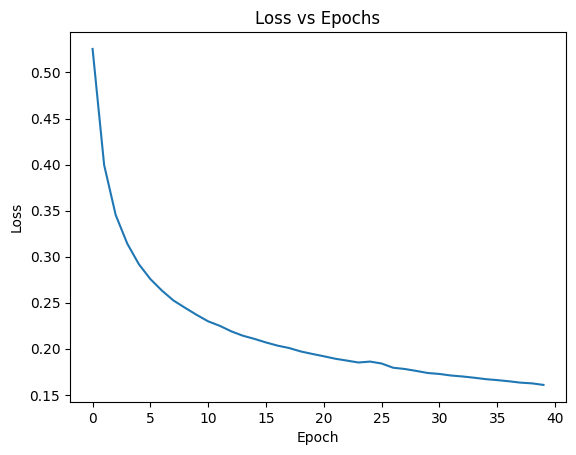

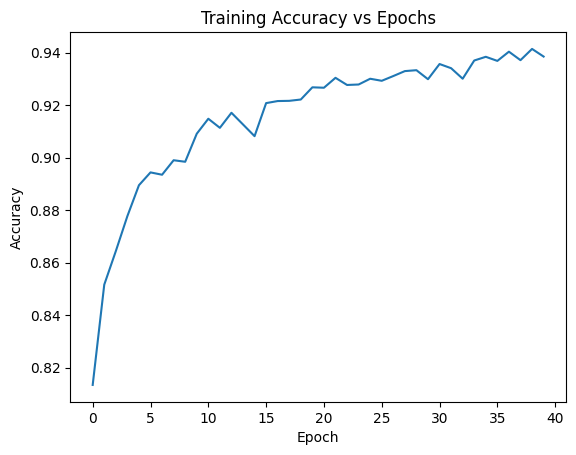

In [27]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# ======================================
# PASO 7: MODELO FINAL + GRÁFICAS
# ======================================

# Hiperparámetros ganadores
hidden1 = 268
hidden2 = 170
lr = 0.001148
batch_size = 64

# Dataset y loader
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Modelo final
final_model = MLP(input_dim, hidden1, hidden2, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(final_model.parameters(), lr=lr)

epochs = 40

loss_history = []
acc_history = []

# Entrenamiento con registro de métricas
for epoch in range(epochs):
    final_model.train()
    running_loss = 0

    for Xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = final_model(Xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    loss_history.append(avg_loss)

    # Accuracy en train
    final_model.eval()
    with torch.no_grad():
        outputs = final_model(X_train_t)
        preds = outputs.argmax(dim=1)
        acc = (preds == y_train_t).float().mean().item()

    acc_history.append(acc)

    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Train Acc: {acc:.4f}")

# Evaluación final en test
final_model.eval()
with torch.no_grad():
    outputs = final_model(X_test_t)
    preds = outputs.argmax(dim=1)
    test_acc = (preds == y_test_t).float().mean().item()

print("\nFINAL TEST ACCURACY:", test_acc)

# ======================================
# GRÁFICAS
# ======================================

plt.figure()
plt.plot(loss_history)
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(acc_history)
plt.title("Training Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


<h2 style="color:#81C784;">7.1 Interpretación</h2>

Primero hay que entender que nuestro flujo tiene dos fases completamente distintas: búsqueda de hiperparámetros (Optuna) y entrenamiento del modelo final. Optuna no existe para dar un modelo entrenado, existe solo para encontrar buenos valores de <span style="color:#FFEB3B; font-weight:bold;">hidden1, hidden2, lr y batch</span>. En cada trial, Optuna crea un modelo nuevo desde cero, lo entrena durante un número reducido de épocas (en nuestro caso 20) y al terminar calcula una sola accuracy. Esa accuracy final representa qué tan buena fue esa combinación. Luego ese modelo se borra y se prueba otro. Por eso Optuna es lento: estás entrenando muchos modelos completos, pero ninguno se conserva.

Al final de Optuna obtuvimos:

```python
hidden1 = 268
hidden2 = 170
lr = 0.001148
batch = 64
```
que son los hiperparámetros ganadores al obtener el accuarcy mas alto en el codigo de la sección 6

Ahora ya podemos explicar a detalle lo que esta pasando en el código de la sección 7  

Aquí ya no usamos Optuna. Ahora construimos un único modelo usando esos hiperparámetros ganadores y los entrenamos seriamente durante 40 épocas. Esta es la primera vez que tendremos un modelo "real". Por eso vuelven a aparecer épocas, porque ahora sí estamos entrenando el sistema final, no explorando configuraciones.

Durante esas 40 épocas ocurre siempre lo mismo, el modelo ve todos los datos de entrenamiento por mini-batches, calcula el error, retropropaga gradientes y Adam ajusta los pesos. Al final de cada época se calcula dos cosas: el loss promedio y el Train Accuracy. Esa accuracy es solo una foto del estado del modelo en ese momento. No es definitiva. Es simplemente para observar cómo progresa el aprendizaje.

Por eso vemos 40 accuracies distintas: **Epoch 1 = 0.81, Epoch 10 = 0.90, Epoch 20 = 0.92 o Epoch 40 = 0.93** *(Las graficas solo sirven para ver esas evolucion)*

Eso no significa que tengas 40 resultados finales, son solo checkpoints intermedios del entrenamiento. Sirven para ver convergencia y si el modelo mejora o se estanca.

Al terminar la época 40 el modelo ya tiene sus pesos finales. Recién ahí hacemos esto:

```python
outputs = final_model(X_test_t)
preds = outputs.argmax(dim=1)
test_acc = (preds == y_test_t).float().mean().item()
```

Aquí estamos usando el conjunto de test que el modelo nunca vio durante entrenamiento. Esta evaluación ocurre una sola vez y es <span style="color:#FFEB3B; font-weight:bold;">FINAL TEST ACCURACY = 0.9257</span>.

Este valor representa el desempeño real del sistema ya entrenado. Entonces las 40 accuracies son de entrenamiento, internas y temporales. El 0.9257 es externo, final y sobre datos nuevos.


<h1 style="color:#4FC3F7;">8. CONCLUSIONES</h1>


En este trabajo se realizó una red neuronal tipo MLP para un problema de clasificación, empezando con una versión básica y luego mejorándola usando Optuna para buscar automáticamente los mejores hiperparámetros. En esta parte, Optuna probó varias combinaciones distintas (número de neuronas, learning rate y batch size). Cada prueba entrenaba un modelo por pocas épocas, solo para ver rápido qué configuración funcionaba mejor.

Después de varias pruebas, Optuna encontró como mejor opción usar 268 neuronas en la primera capa, 170 en la segunda, un learning rate de 0.001148 y un batch size de 64.

Con esos valores ya definidos, entrené el modelo final durante 40 épocas completas. Esta ya fue la etapa "real" de aprendizaje. Durante el entrenamiento se pudo ver cómo la pérdida iba bajando poco a poco y cómo la accuracy iba subiendo, empezando cerca del 81% y llegando aproximadamente al 94%. Las gráficas ayudan bastante a ver este proceso y muestran que el modelo aprende de forma estable, sin comportamientos raros.

Es importante aclarar que esas accuracies que aparecen durante las 40 épocas son solo del conjunto de entrenamiento. Sirven para ver cómo va aprendiendo la red, pero no indican el rendimiento real. Lo más importante es la evaluación final usando el conjunto de test, que el modelo nunca vio antes.

Al probar el modelo entrenado con los datos de test, se obtuvo una accuracy aproximada de 0.9257 (alrededor del 93%). Esto muestra que el modelo generaliza bien a datos nuevos. Además, este resultado es un poco mejor que el obtenido durante Optuna, lo cual tiene sentido porque ahora el modelo fue entrenado más tiempo usando los mejores parámetros encontrados.

En resumen, primero se usó Optuna para ajustar los hiperparámetros y luego entrenar un modelo final resultó ser una buena estrategia. Se logró mejorar el rendimiento sin tener que probar todo manualmente, y las gráficas permitieron entender visualmente cómo fue el aprendizaje.

Como conclusión, el MLP que implementé alcanza un desempeño bastante sólido, con cerca del 93% de acierto en datos de prueba, mostrando que tanto la arquitectura elegida como el proceso de optimización funcionaron correctamente.